# Gender Neutrality & Inclusion

> Problem:

Companies are expected to be equal opportunity employers. Their recruitment and selection process is expected to provide equal opportunity irrespective of gender identity or expression, religion, color, sex, age, physical or mental disability, sexual orientation, or any other basis covered by local law. Removal of bias and providing equal opportunity to all applicants promotes access to the widest pool of talent. 

XyX corporation recruits employees for fixed Job Codes every year. Basis the applications received last year for each job code profile, a 'fitment %' percentage was determined based on selections made. XyX followed a fair and equitable approach by personally looking at all parameters and determining the right fit. This year the number of applicants has multiplied and they are looking at an ML model to predict the 'fitment %' for the applications received maintaining a fair and equitable approach.

> Task: 


Build a model that calculates the 'fitment %' & detects the factor that influences relevancy and making sure that factor does not introduce inequality and/or bias in the' fitment %' by appropriate feature re-engineering. 

> Data Set

```
EmpID  -->  ID of the employee
EmpName  -->  Name of the employee
LanguageOfCommunication  -->  Communication language
Age  -->  Age of the employee
Gender  -->  Gender of the Employee
JobProfileIDApplyingFor  -->  External Job ID
HighestDegree  -->  Highest degree of the employee
DegreeBranch  -->  Specialization of degree
GraduatingInstitute  -->  Tier of Institute
LatestDegreeCGPA  -->  CGPA obtained
YearsOfExperince  -->  Number of years of experince (Relevant)
GraduationYear  -->  Year of Graduation
CurrentCTC  -->  Compensation received by current employer
ExpectedCTC  -->  Expected Compensation
MartialStatus  -->  Martial status of candidate
EmpScore  -->  Rating given by recommender to the employee
CurrentDesignation  -->  Current designation of the candidate
CurrentCompanyType  -->  Type of employer company
DepartmentInCompany  -->  Department of the employer company
TotalLeavesTaken  -->  Total leaves taken by employee
BiasInfluentialFactor  -->  Feature that introduces the most bias on the fitment %
FitmentPercent  -->  % Fitment of the candidate to the job profile id basis background and other factors
```

## Import dataset

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

c:\program files\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python39\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
c:\program files\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Add train and test dataset
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

# check dataset shape
df_train.shape, df_test.shape

((13645, 22), (8745, 20))

In [3]:
# View first 5 rows from train dataset
df_train.head().T

,0,1,2,3,4
EmpID,11041,15079,18638,3941,5936
EmpName,John,William,James,Charles,George
LanguageOfCommunication,English,English,English,English,English
Age,35,26,36,29,25
Gender,Male,Male,Female,Female,Male
JobProfileIDApplyingFor,JR85289,JR87525,JR87525,JR87525,JR70175
HighestDegree,B.Tech,B.Tech,PhD,BCA,Dual M.Tech
DegreeBranch,Electrical,Artificial Intelligence,Computer Science,Information Technology,Computer Science
GraduatingInstitute,Tier 1,Tier 3,Tier 1,Tier 2,Tier 3
LatestDegreeCGPA,7,7,6,5,8


In [4]:
# View all columns name in train dataset
df_train.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [5]:
# View first 5 rows from test dataset
df_test.head().T

,0,1,2,3,4
EmpID,5664,23568,21490,8363,6165
EmpName,Theo,Vernie,Wendell,West,Alford
LanguageOfCommunication,Native,English,English,Hindi,Hindi
Age,35,35,28,37,36
Gender,Male,Male,Male,Male,Female
JobProfileIDApplyingFor,JR85289,JR85289,JR87525,JR87525,JR85289
HighestDegree,PhD,B.Tech,M.Tech,MS,PhD
DegreeBranch,Information Technology,Information Technology,Artificial Intelligence,Computer Science,Artificial Intelligence
GraduatingInstitute,Tier 2,Tier 3,Tier 2,Tier 2,Tier 2
LatestDegreeCGPA,5,9,9,8,7


In [6]:
# View all columns name in test dataset
df_test.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken'],
      dtype='object')

In [7]:
# view train data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

### Show the counts of observations in each categorical bin using bars.

c:\program files\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


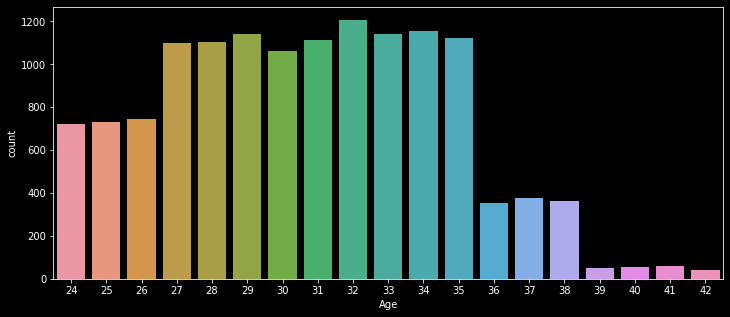

In [8]:
# Show value counts for a Age variable
plt.figure(figsize=(12, 5))
sns.countplot(df_train['Age']);

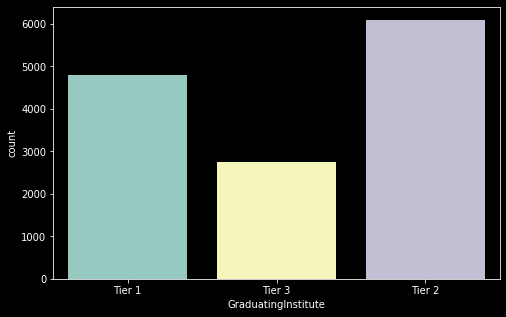

In [9]:
# Show value counts for a Graduating Institute variable
plt.figure(figsize=(8, 5))
sns.countplot(x='GraduatingInstitute',data=df_train);

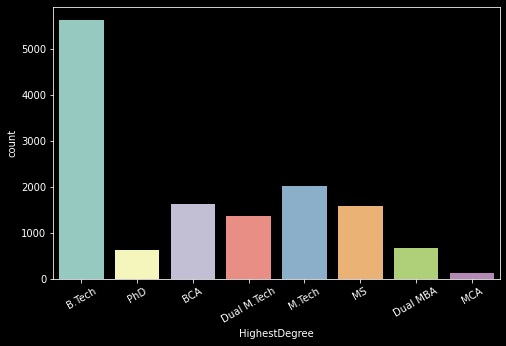

In [10]:
# Show value counts for a Highest Degree variable
plt.figure(figsize=(8, 5))
sns.countplot(x='HighestDegree',data=df_train)
plt.xticks(rotation=30);

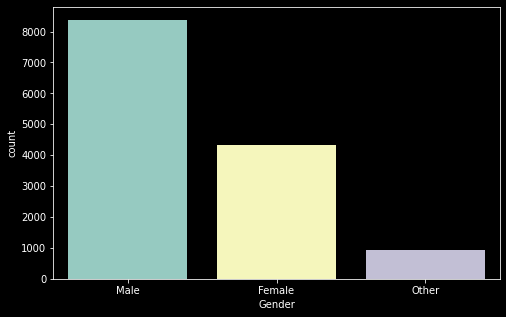

In [11]:
# Show value counts for a Gender variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df_train);

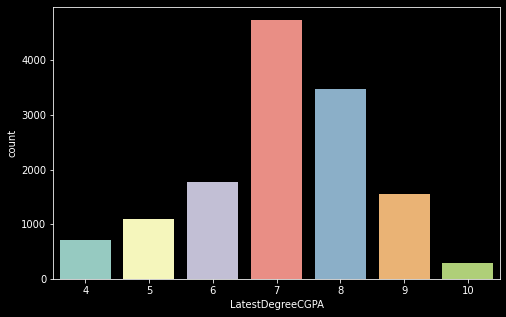

In [12]:
# Show value counts for a Latest Degree CGPA variable
plt.figure(figsize=(8, 5))
sns.countplot(x='LatestDegreeCGPA',data=df_train);

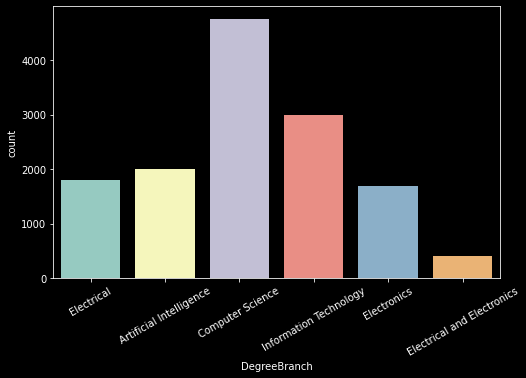

In [13]:
# Show value counts for a Degree Branch variable
plt.figure(figsize=(8, 5))
sns.countplot(x='DegreeBranch',data=df_train)
plt.xticks(rotation=30);

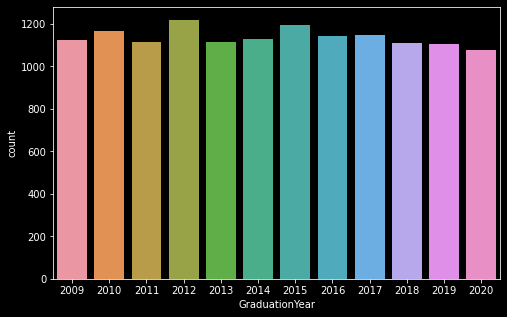

In [14]:
# Show value counts for a Graduation Year variable
plt.figure(figsize=(8, 5))
sns.countplot(x='GraduationYear',data=df_train);

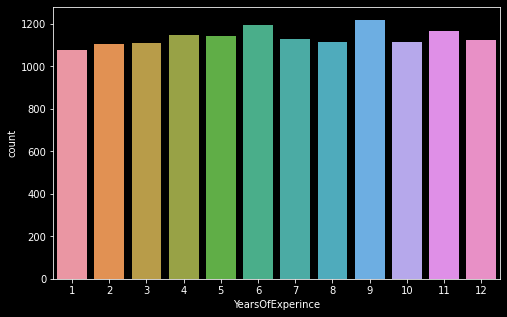

In [15]:
# Show value counts for a Year of Expreriance variable
plt.figure(figsize=(8, 5))
sns.countplot(x='YearsOfExperince',data=df_train);

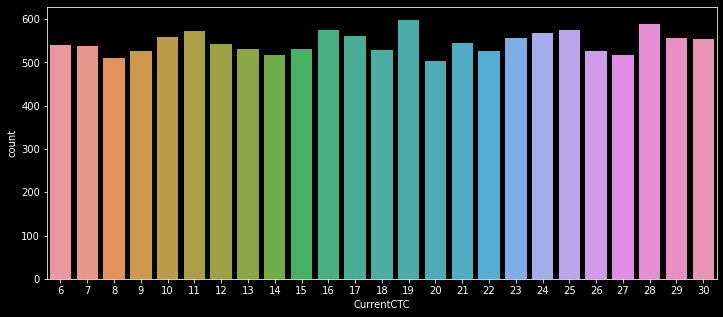

In [16]:
# Show value counts for a Current CTC variable
plt.figure(figsize=(12, 5))
sns.countplot(x='CurrentCTC',data=df_train);

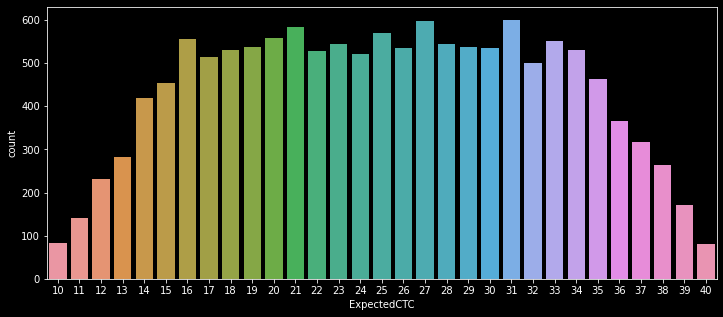

In [17]:
# Show value counts for a Expected CTC variable
plt.figure(figsize=(12, 5))
sns.countplot(x='ExpectedCTC',data=df_train);

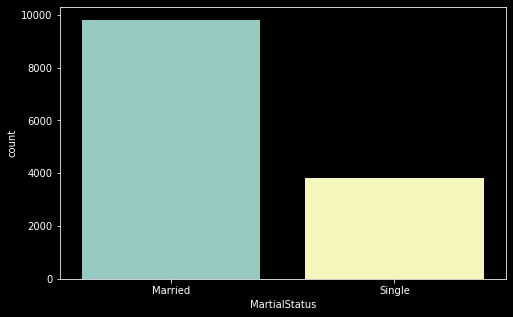

In [18]:
# Show value counts for a Martial Status variable
plt.figure(figsize=(8, 5))
sns.countplot(x='MartialStatus',data=df_train);

<Figure size 576x504 with 0 Axes>

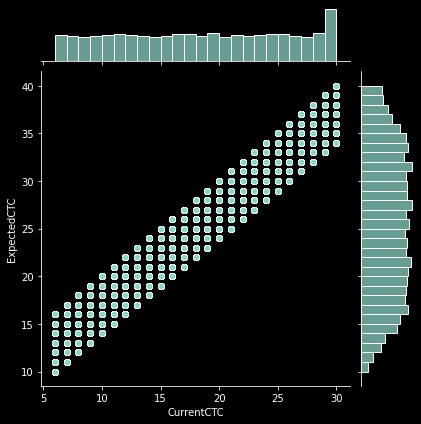

In [19]:
# In the simplest invocation Current CTC and Expected CTC
plt.figure(figsize=(8, 7))
sns.jointplot(x='CurrentCTC',y='ExpectedCTC',data=df_train);

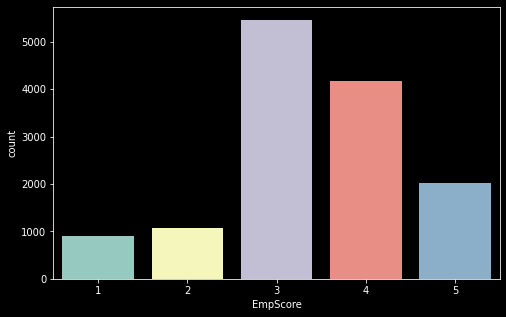

In [20]:
# Show value counts for a Emp Score variable
plt.figure(figsize=(8, 5))
sns.countplot(x='EmpScore', data=df_train);

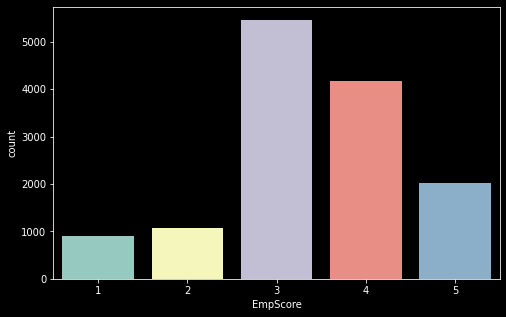

In [21]:
# Show value counts for a EMP Score variable
plt.figure(figsize=(8, 5))
sns.countplot(x='EmpScore',data=df_train);

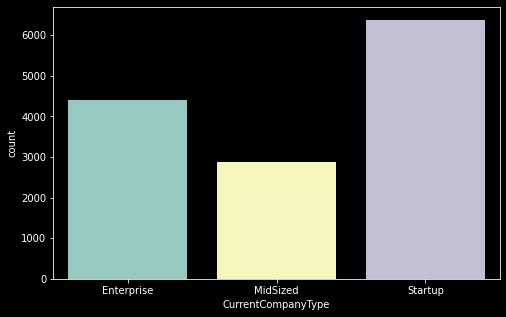

In [22]:
# Show value counts for a Current Company Type variable
plt.figure(figsize=(8, 5))
sns.countplot(x='CurrentCompanyType',data=df_train);

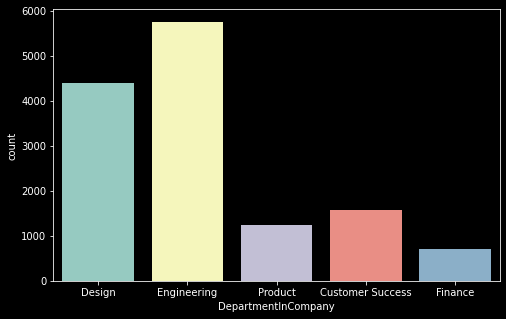

In [23]:
# Show value counts for a Department In Company variable
plt.figure(figsize=(8, 5))
sns.countplot(x='DepartmentInCompany',data=df_train);

<AxesSubplot:xlabel='TotalLeavesTaken', ylabel='count'>

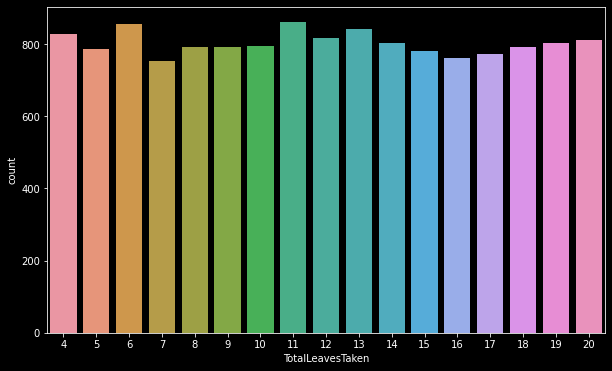

In [24]:
# Show value counts for a Total Leaves Taken variable
plt.figure(figsize=(10, 6))
sns.countplot(x='TotalLeavesTaken', data=df_train)

In [25]:
# Check any Null values in train dataset
df_train.isna().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

In [26]:
# Check Unique values in Bias In Fluential Factor
df_train.BiasInfluentialFactor.unique()

array(['YearsOfExperince', nan, 'Gender', 'DegreeBranch',
       'CurrentCompanyType', 'MartialStatus', 'HighestDegree', 'EmpScore',
       'Ethinicity', 'LatestDegreeCGPA'], dtype=object)

> Note: IN train and test data "EmpID" is necessary for training data we make to Index and reload the data

In [27]:
# reload data because I have to add EmpID as index
df_train = pd.read_csv('Train.csv', index_col=0)
df_test = pd.read_csv('Test.csv', index_col=0)

In [28]:
# add sample input
sample = pd.read_csv('sample submission.csv')

sample

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,MaritalStatus,25.14
1,23568,DegreeBranch,91.44
2,21490,MartialStatus,76.92
3,8363,HighestDegree,77.92
4,6165,Gender,85.64
5,17679,NaN,41.23
6,9715,NaN,50.00


> Note: According to sample output we have to prediction two different Dependent value 
1. `BiasInfluentialFactor`
    * This data is categorical data therefor use Classification model
2. `FitmentPercent`
    * This data is Numerical data therefor use Regression model

In [29]:
# spilt data into x and y on df_machine

# Drop Independent data from train data 'BiasInfluentialFactor' and 'FitmentPercent'
# And we don't need EmpName for train model drop this column also
x = df_train.drop(columns=['BiasInfluentialFactor', 'FitmentPercent', 'EmpName'])

# Make two independent data set
y_Bias = df_train['BiasInfluentialFactor']
y_Fper = df_train['FitmentPercent']

In [30]:
# convert all data in categorical
X_dummy = pd.get_dummies(x)

In [31]:
# In y_Bias dataset Fill Null value with string 'nan'
y_Bias.fillna(value='nan', inplace=True)

In [32]:
# y_Bias Unique data
y_Bias.unique()

array(['YearsOfExperince', 'nan', 'Gender', 'DegreeBranch',
       'CurrentCompanyType', 'MartialStatus', 'HighestDegree', 'EmpScore',
       'Ethinicity', 'LatestDegreeCGPA'], dtype=object)

In [33]:
# Create dictionary for convert Categorical data into Numerical data
y_cat = {'nan': 0, 
         'YearsOfExperince': 1, 
         'Gender': 2, 
         'DegreeBranch': 3, 
         'CurrentCompanyType': 4, 
         'MartialStatus': 5, 
         'HighestDegree': 6, 
         'EmpScore': 7, 
         'Ethinicity': 8, 
         'LatestDegreeCGPA': 9}

In [34]:
# y_Bias data Repalce using y_cat and save to y_Bias_cat
y_Bias_cat = y_Bias.replace(y_cat)

In [35]:
y_Bias_cat

EmpID
11041    1
15079    0
18638    2
3941     2
5936     3
        ..
19504    2
17071    0
6659     4
5986     7
4668     1
Name: BiasInfluentialFactor, Length: 13645, dtype: int64

## Run Model

In [55]:
# first add some library
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, classification_report
from xgboost import XGBClassifier, XGBRegressor

In [37]:
# create the models dict

models_reg = {'LinearRegression' : LinearRegression(),
              'RandomForestRegressor' : RandomForestRegressor(),
              'KNeighborsRegressor' : KNeighborsRegressor(),
              'XGBRegressor' : XGBRegressor()}

models_cla = {'LogisticRegression' : LogisticRegression(),
              'RandomForestClassifier' : RandomForestClassifier(),
              'KNeighborsClassifier' : KNeighborsClassifier(),
              'XGBClassifier' : XGBClassifier()}

In [38]:
# Run classification model

# Set the random seed
np.random.seed(42)

score = {}
# FIt and run the model
for name, model in models_cla.items():
    
    # Fit the model
    model.fit(X_dummy, y_Bias_cat)
    
    # check score
    score[name] = model.score(X_dummy, y_Bias_cat)
    
score

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarni

[20:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'LogisticRegression': 0.36350311469402713,
 'RandomForestClassifier': 1.0,
 'KNeighborsClassifier': 0.6113594723341883,
 'XGBClassifier': 0.9770611945767681}

<AxesSubplot:>

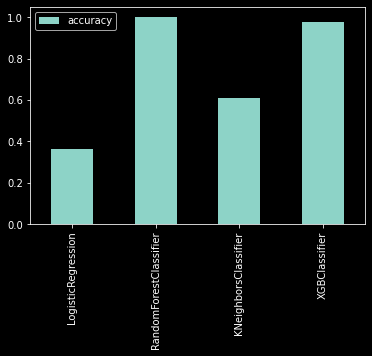

In [39]:
# Plot accuracy for Calssification
pd.DataFrame(score, index=['accuracy']).T.plot.bar()

> Note: According accuracy plot Random Forest Classifier accuracy is very high therefor run model using **`RandomForestClassifier`**

In [40]:
# Run classification model

# Set the random seed
np.random.seed(42)

score_ = {}
# FIt and run the model
for name, model in models_reg.items():
    
    # Fit the model
    model.fit(X_dummy, y_Bias_cat)
    
    # check score
    score_[name] = model.score(X_dummy, y_Bias_cat)
    
score_

{'LinearRegression': 0.19090461439171236,
 'RandomForestRegressor': 0.9296781609196285,
 'KNeighborsRegressor': 0.35577970531180203,
 'XGBRegressor': 0.797371803719307}

<AxesSubplot:>

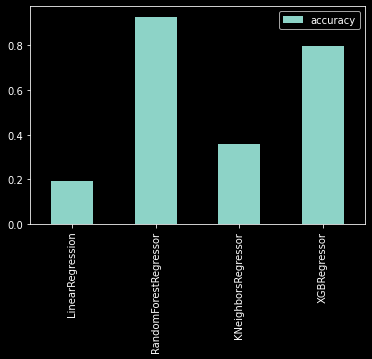

In [41]:
# PLot accuracy for Regression model
pd.DataFrame(score_, index=['accuracy']).T.plot.bar()

> Note: According accuracy plot Random Forest Regressor accuracy is very high therefor run model using **`RandomForestRegressor`**

In [42]:
# Drop EmpName
X_test = df_test.drop(columns='EmpName')

# Now covert test into categorical format
X_test = pd.get_dummies(X_test)

In [43]:
# Check all columns name save in both training and testing datasets
X_dummy.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [44]:
# according train data we check all model we have seen that RandomForestClassifier has best score
rfc_model = RandomForestClassifier(random_state=42)

# Fit the model
rfc_model.fit(X_dummy, y_Bias_cat)

RandomForestClassifier(random_state=42)

In [45]:
# # according train data we check all model we have seen that RandomForestRegressor has best score
rfr_model = RandomForestRegressor(random_state=42)

# Fit the model
rfr_model.fit(X_dummy, y_Fper)

RandomForestRegressor(random_state=42)

In [46]:
# Predict BiasInfluentialFactor value
Bias_pred = rfc_model.predict(X_test)
Bias_pred

array([3, 3, 5, ..., 3, 0, 0], dtype=int64)

In [47]:
# Predict FitmentPercent
Fper_pred = rfr_model.predict(X_test)
Fper_pred

array([90.8436, 90.0586, 82.4641, ..., 81.1019, 52.0839, 54.1497])

In [48]:
# Drop all columns from test dataset
Final = df_test.drop(columns=['EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken'])

# Create new columns from predict data
Final['BiasInfluentialFactor'] = Bias_pred
Final['FitmentPercent'] = Fper_pred

In [49]:
# We covert Numerical data to Categorical data
reverce_bias = {0: 'nan', 
                1: 'YearsOfExperince', 
                2: 'Gender',
                3: 'DegreeBranch',
                4: 'CurrentCompanyType',
                5: 'MartialStatus',
                6: 'HighestDegree',
                7: 'EmpScore',
                8: 'Ethinicity',
                9: 'LatestDegreeCGPA'}

# Replace data 
Final.BiasInfluentialFactor = Final['BiasInfluentialFactor'].replace(reverce_bias)
Final

,BiasInfluentialFactor,FitmentPercent
EmpID,,
5664,DegreeBranch,90.8436
23568,DegreeBranch,90.0586
21490,MartialStatus,82.4641
8363,nan,52.2967
6165,Gender,78.7223
...,...,...
14758,Gender,79.0230
23544,HighestDegree,79.7750
16175,DegreeBranch,81.1019


In [51]:
# Save data into mypredicteddata.csv 
Final.to_csv('mypredicteddata.csv', index=True, index_label='EmpID')

In [53]:
# 
pred = rfc_model.predict(X_dummy)

In [54]:
# Confusion matrix
print(confusion_matrix(y_Bias_cat, pred))

[[3336    0    0    0    0    0    0    0    0    0]
 [   0 1561    0    0    0    0    0    0    0    0]
 [   0    0 2605    0    0    0    0    0    0    0]
 [   0    0    0 2858    0    0    0    0    0    0]
 [   0    0    0    0 1174    0    0    0    0    0]
 [   0    0    0    0    0  280    0    0    0    0]
 [   0    0    0    0    0    0  582    0    0    0]
 [   0    0    0    0    0    0    0  659    0    0]
 [   0    0    0    0    0    0    0    0  328    0]
 [   0    0    0    0    0    0    0    0    0  262]]


In [57]:
# Confusion matrix
print(classification_report(y_Bias_cat, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      1561
           2       1.00      1.00      1.00      2605
           3       1.00      1.00      1.00      2858
           4       1.00      1.00      1.00      1174
           5       1.00      1.00      1.00       280
           6       1.00      1.00      1.00       582
           7       1.00      1.00      1.00       659
           8       1.00      1.00      1.00       328
           9       1.00      1.00      1.00       262

    accuracy                           1.00     13645
   macro avg       1.00      1.00      1.00     13645
weighted avg       1.00      1.00      1.00     13645



In [58]:
preds = rfr_model.predict(X_dummy)

In [61]:
print(confusion_matrix(y_Fper, preds))

ValueError: continuous is not supported